In [1]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

Counter({1: 7000, 0: 3000})


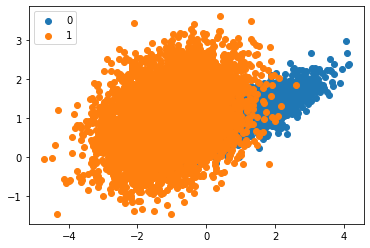

In [2]:
from matplotlib import pyplot as plt
from numpy import where
from collections import Counter

counter = Counter(y)
print(counter)

def plot_points(counter):
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.legend()
    plt.show()
    
plot_points(counter)

In [3]:
import imblearn
print(imblearn.__version__)

0.8.1


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.model_selection import train_test_split

def decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    
    print("Decision tree classifier performance:")
    print(
        f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_tree):.2f} - "
        f"Geometric mean {geometric_mean_score(y_test, y_pred_tree):.2f}"
    )

In [7]:
decision_tree(X,y)

Decision tree classifier performance:
Balanced accuracy: 0.86 - Geometric mean 0.86


Counter({0: 3000, 1: 3000})


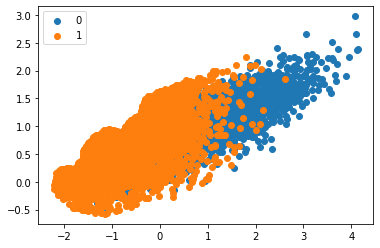

Decision tree classifier performance:
Balanced accuracy: 0.78 - Geometric mean 0.78


In [8]:
# NearMiss-1
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
decision_tree(X,y)

Counter({0: 3000, 1: 3000})


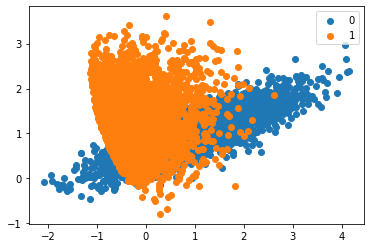

Decision tree classifier performance:
Balanced accuracy: 0.83 - Geometric mean 0.83


In [9]:
# NearMiss-2
from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

undersample = NearMiss(version=2, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
decision_tree(X,y)

/home/samyak/.local/lib/python3.8/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:175: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Counter({0: 3000, 1: 1172})


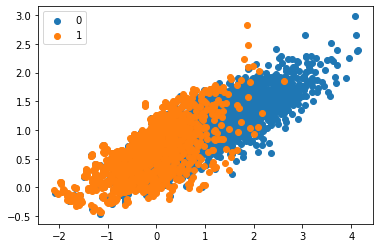

Decision tree classifier performance:
Balanced accuracy: 0.63 - Geometric mean 0.60


In [10]:
# NearMiss-3
from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

undersample = NearMiss(version=3, n_neighbors=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

plot_points(counter)
decision_tree(X,y)

Counter({0: 3000, 1: 1002})


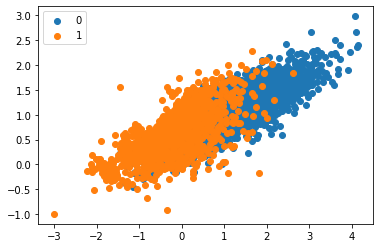

Decision tree classifier performance:
Balanced accuracy: 0.61 - Geometric mean 0.56


In [11]:
from imblearn.under_sampling import CondensedNearestNeighbour

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)

undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
decision_tree(X,y)

Counter({1: 6607, 0: 3000})


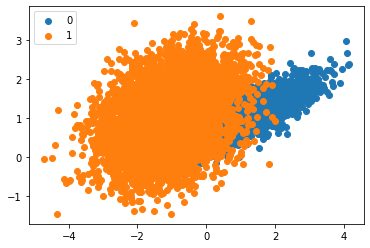

Decision tree classifier performance:
Balanced accuracy: 0.91 - Geometric mean 0.91


In [12]:
from imblearn.under_sampling import TomekLinks

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)
undersample = TomekLinks()
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
decision_tree(X,y)

Counter({0: 3000, 1: 1833})


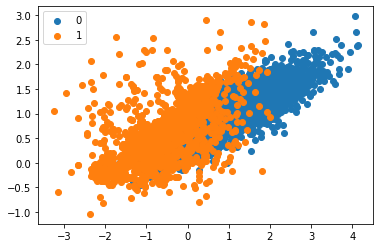

Decision tree classifier performance:
Balanced accuracy: 0.80 - Geometric mean 0.80


In [13]:
from imblearn.under_sampling import OneSidedSelection

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.3], flip_y=0, random_state=1)
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

plot_points(counter)
decision_tree(X,y)